In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.3 MB/s eta 0:00:00


In [ ]:
import pdfplumber
with pdfplumber.open('story.pdf') as pdf:
  for page in pdf.pages:
    text = page.extract_text()
    print(text)

In the bustling city of Lumina, there was an inventor named Zara who had a knack
for turning ordinary objects into extraordinary gadgets. Her latest creation was
a seemingly ordinary pair of sneakers, but with a twist—these shoes could make
the wearer run at lightning speed!
Zara decided to test them out on the city's annual Fun Run day, where
participants dressed up in costumes and raced across town. Zara slipped into her
sneakers, disguised herself as a superhero called "The Flash Rocket," and took
her spot at the starting line, surrounded by people in crazy outfits—there was a
pirate, a giant chicken, and even someone dressed as a slice of pizza.
When the race began, Zara tapped a button on the side of the sneakers, and they
took off like a rocket! She zoomed past the crowd, weaving between the runners
and occasionally doing flips just for fun. She was so fast that everything
around her turned into a colorful blur.
But as she rounded a corner near the city park, Zara noticed somethi

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
cleaned_text = ' '.join([token.text for token in doc if not token.is_stop and not token.is_punct])
print(cleaned_text)

bustling city Lumina inventor named Zara knack 
 turning ordinary objects extraordinary gadgets latest creation 
 seemingly ordinary pair sneakers twist shoes 
 wearer run lightning speed 
 Zara decided test city annual Fun Run day 
 participants dressed costumes raced town Zara slipped 
 sneakers disguised superhero called Flash Rocket took 
 spot starting line surrounded people crazy outfits 
 pirate giant chicken dressed slice pizza 
 race began Zara tapped button sneakers 
 took like rocket zoomed past crowd weaving runners 
 occasionally flips fun fast 
 turned colorful blur 
 rounded corner near city park Zara noticed unusual 
 giant inflatable unicorn come loose nearby children festival 
 drifting runners looked like cause major pile 
 second thought Zara sharp turn sprinted 
 unicorn 
 lightning speed shoes grab unicorn reins steer 
 safety tying securely nearby tree crowd cheered thinking 
 Zara superhero disguise gave 
 playful salute speeding finish race 
 crossed finish lin

In [ ]:
doc = nlp(cleaned_text)
for ent in doc.ents:
  print(ent.text, ent.label_)

Zara PERSON
Zara PERSON
annual DATE
Zara PERSON
Flash Rocket PERSON
Zara PERSON
Zara PERSON
second ORDINAL
Zara PERSON
Flash Rocket PERSON
Zara PERSON
Flash Rocket PERSON
Zara PERSON


In [ ]:
from transformers import BertTokenizer, BertForTokenClassification
from transformers import pipeline
tokenizer = BertTokenizer.from_pretrained('dslim/bert-base-NER')
model = BertForTokenClassification.from_pretrained('dslim/bert-base-NER')
nlp_ner = pipeline('ner', model=model, tokenizer=tokenizer)
ner_results = nlp_ner(cleaned_text)
import json
output = {"Entities": ner_results}
print(output)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'Entities': [{'entity': 'B-MISC', 'score': 0.29433614, 'index': 4, 'word': 'Lu', 'start': None, 'end': None}, {'entity': 'B-PER', 'score': 0.95811146, 'index': 8, 'word': 'Z', 'start': None, 'end': None}, {'entity': 'B-PER', 'score': 0.4868917, 'index': 9, 'word': '##ara', 'start': None, 'end': None}, {'entity': 'B-ORG', 'score': 0.47830528, 'index': 33, 'word': 'Z', 'start': None, 'end': None}, {'entity': 'B-MISC', 'score': 0.9771707, 'index': 39, 'word': 'Fun', 'start': None, 'end': None}, {'entity': 'I-MISC', 'score': 0.99545395, 'index': 40, 'word': 'Run', 'start': None, 'end': None}, {'entity': 'B-PER', 'score': 0.6563035, 'index': 47, 'word': 'Z', 'start': None, 'end': None}, {'entity': 'B-PER', 'score': 0.96339625, 'index': 55, 'word': 'Flash', 'start': None, 'end': None}, {'entity': 'I-PER', 'score': 0.8121725, 'index': 56, 'word': 'Rocket', 'start': None, 'end': None}, {'entity': 'B-PER', 'score': 0.5293691, 'index': 73, 'word': 'Z', 'start': None, 'end': None}, {'entity': 'B

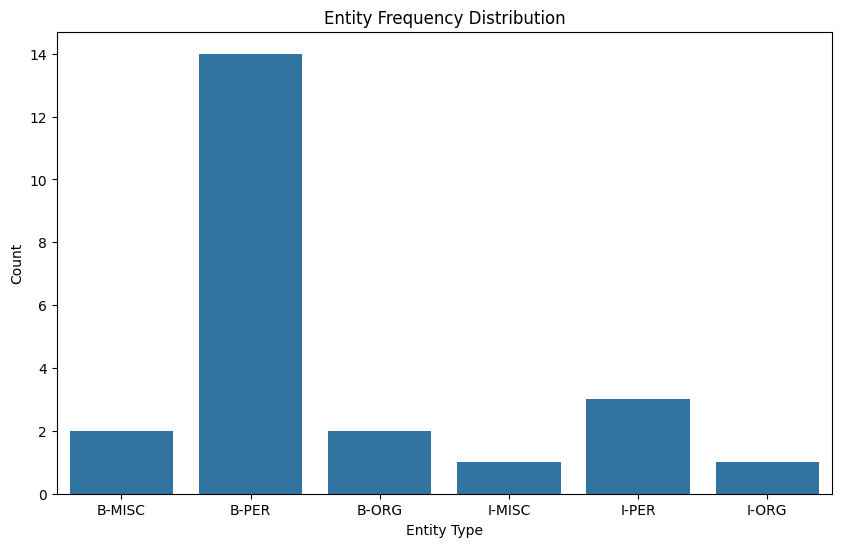

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
entities = [ent['entity'] for ent in ner_results]
entity_counts = Counter(entities)
plt.figure(figsize=(10,6))
sns.barplot(x=list(entity_counts.keys()), y=list(entity_counts.values()))
plt.title('Entity Frequency Distribution')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.show()